# Multi-Label Classification

## 1. pré processamento


### Importações

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


### Persistência de Arquivo

In [4]:
import scipy
from scipy.io import arff
data, meta = scipy.io.arff.loadarff("multilabel-classification-emotions/emotions.arff")
df = pd.DataFrame(data)



from scipy import stats

from sklearn import preprocessing, neighbors, metrics, svm, multiclass

labels = ['amazed-suprised', 'happy-pleased', 'relaxing-calm', 'quiet-still',
       'sad-lonely', 'angry-aggresive']

In [5]:
df.shape

(593, 78)

In [6]:
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])
print("\n")

printmd("**Sample data:**")
df.head()

Number of rows in data = 593
Number of columns in data = 78




**Sample data:**

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,b'0',b'0',b'0',b'1',b'0',b'0'


### 1.1. Verificando valores faltantes,  removendo duplicatas

In [7]:
df.isnull().values.any()


False

In [8]:
df.drop_duplicates().values

array([[0.034741, 0.089665, 0.091225, ..., b'0', b'0', b'0'],
       [0.081374, 0.272747, 0.085733, ..., b'0', b'0', b'1'],
       [0.110545, 0.273567, 0.08441, ..., b'0', b'0', b'1'],
       ...,
       [0.035169, 0.065403, 0.075227, ..., b'1', b'1', b'0'],
       [0.054276, 0.238158, 0.095935, ..., b'0', b'0', b'0'],
       [0.073194, 0.140733, 0.080545, ..., b'0', b'0', b'0']],
      dtype=object)

In [9]:
df.shape

(593, 78)

### 1.2. Calculando numero de instancias por label

In [10]:
somaPorLinha = df.iloc[:,72:].sum(axis=1)
contadorDevazio = (somaPorLinha==0).sum(axis=0)

print("Total number of instancies = ",len(df))
print("N of clean labels = ",contadorDevazio)
print("N of instancies with labels =",(len(df)-contadorDevazio))

Total number of instancies =  593
N of clean labels =  0
N of instancies with labels = 593


#### como nao existem clean lebels, foi verificado que nenhum atributo esta sem pertencer a alguma classe, 
#### logo todos os atributos pertencem a pelo menos uma classe

### Categorias existentes

In [11]:
categories = list(df.columns.values)
categories = categories[72:]
print(categories)

['amazed-suprised', 'happy-pleased', 'relaxing-calm', 'quiet-still', 'sad-lonely', 'angry-aggresive']


### Convertendo "emocoes" (ultimas 6 colunas) de binario para inteiro


In [12]:

df["amazed-suprised"]= df["amazed-suprised"].astype(int)
df["happy-pleased"]= df["happy-pleased"].astype(int)
df["relaxing-calm"]= df["relaxing-calm"].astype(int)
df["quiet-still"]= df["quiet-still"].astype(int)
df["sad-lonely"]= df["sad-lonely"].astype(int)
df["angry-aggresive"]= df["angry-aggresive"].astype(int)

In [13]:
df.describe()  

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,0.069309,0.195399,0.085695,-72.998228,4.979178,0.602395,1.694625,0.634156,0.833964,0.508060,...,2.099494,0.412940,0.354901,0.959906,0.291737,0.279933,0.445194,0.249578,0.283305,0.318718
std,0.031293,0.117605,0.009260,7.580804,2.071792,1.017603,0.606581,0.448746,0.368312,0.303277,...,0.316040,0.339559,0.362262,0.651827,0.454946,0.449345,0.497407,0.433134,0.450984,0.466373
min,0.010201,0.038286,0.070932,-99.090802,0.051474,-2.277307,-0.604609,-1.143864,-0.237114,-0.444623,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044781,0.107742,0.079018,-77.078349,3.409922,-0.113441,1.307242,0.373195,0.605057,0.309033,...,2.000000,0.179411,0.099424,0.513974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.065251,0.169757,0.083637,-72.474302,4.642338,0.588380,1.731031,0.618838,0.819652,0.534665,...,2.000000,0.309902,0.246193,0.804229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.086290,0.257668,0.091323,-68.292848,6.439446,1.293202,2.072488,0.925091,1.051206,0.708430,...,2.000000,0.529859,0.472593,1.242089,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,0.195412,0.698277,0.159460,-56.297652,12.069754,3.910873,4.382370,2.252710,2.358098,1.484489,...,3.000000,1.795128,1.797765,3.422899,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
g = df.iloc[:,72:]
g['amazed-suprised'].values.sum()

173

### Calculando numero de instâncias por categoria

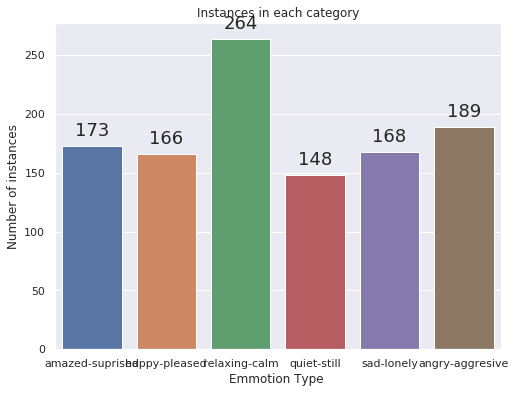

In [15]:
sns.set(font_scale = 1)
plt.figure(figsize=(8,6))

ax= sns.barplot(categories, df.iloc[:,72:].sum().values)

plt.title("Instances in each category", fontsize=12)
plt.ylabel('Number of instances', fontsize=12)
plt.xlabel('Emmotion Type ', fontsize=12)

8
rects = ax.patches
labels = df.iloc[:,72:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

###  Numero de instâncias multi-label

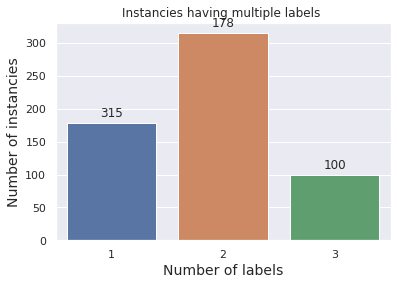

In [16]:
rowSums = df.iloc[:,72:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
#multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 1)
plt.figure(figsize=(6,4))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Instancies having multiple labels ")
plt.ylabel('Number of instancies', fontsize=14)
plt.xlabel('Number of labels', fontsize=14)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [17]:
x = df.iloc[:, :72]
y = df.iloc[:, 72:]   

x = np.array(y)
y = np.array(y, dtype=np.int)


In [18]:
y

array([[0, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1],
       ...,
       [0, 0, 1, 1, 1, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

## 2. Data Pre-Processing

In [19]:
data = df
data.shape


(593, 78)

### visualização de outliers dos dados originais

<IPython.core.display.Javascript object>


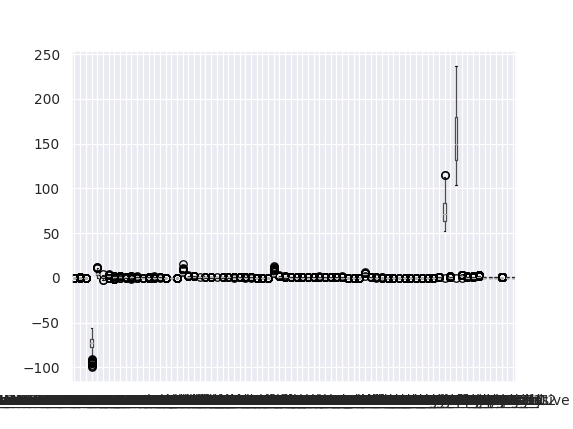

In [20]:
%matplotlib notebook

data.boxplot()

In [21]:
from scipy import stats



Atributos com outliers: 70 (Porcentagem = 0.90)

Total de outliers: 486


<IPython.core.display.Javascript object>


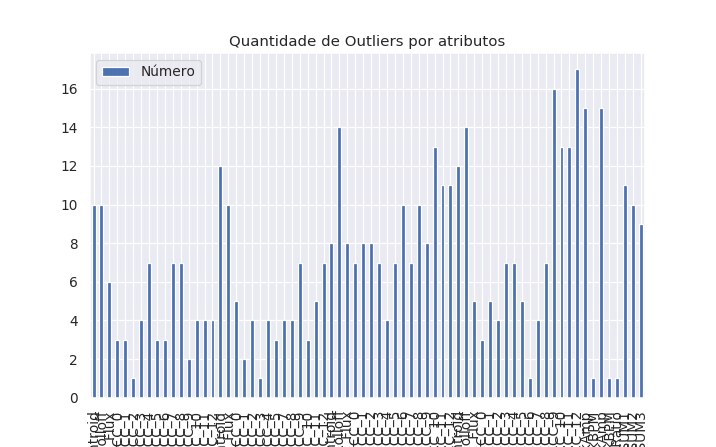

Text(0.5, 1.0, 'Quantidade de Outliers por atributos')

In [22]:
threshold = 3
outliers = []
total = 0
resultado = []

for col in data.columns:
    outlier = len(data[(np.abs(stats.zscore(data[col]))>= threshold)])
    total += outlier
    if(outlier>0):
        outliers.append(data[(np.abs(stats.zscore(data[col])) >= threshold)])
        resultado.append({"Número":len(data[(np.abs(stats.zscore(data[col]))>= threshold)]), "Coluna": col})
        
print("\nAtributos com outliers: %d (Porcentagem = %.2f)" % (len(outliers), len(outliers)/len(data.columns)))
print("\nTotal de outliers: %d" % (total))

pd.DataFrame(resultado).plot.bar(x = "Coluna", y = "Número", figsize = (8, 5))
plt.title("Quantidade de Outliers por atributos")

In [23]:
corr = data.corr()
corr.style.background_gradient(cmap ='coolwarm')


In [25]:
corr = data.corr().iloc[ : -6, -6: ]
corr.style.background_gradient(cmap ='coolwarm')


,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
Mean_Acc1298_Mean_Mem40_Centroid,0.345763,0.108973,-0.305083,-0.424649,-0.335437,0.267874
Mean_Acc1298_Mean_Mem40_Rolloff,0.339501,0.031251,-0.348233,-0.491562,-0.380406,0.375731
Mean_Acc1298_Mean_Mem40_Flux,0.099508,0.038193,-0.171167,-0.393341,-0.286426,0.278627
Mean_Acc1298_Mean_Mem40_MFCC_0,0.383036,0.045602,-0.424995,-0.492264,-0.163028,0.413489
Mean_Acc1298_Mean_Mem40_MFCC_1,-0.347632,-0.070625,0.415806,0.597033,0.401008,-0.455261
Mean_Acc1298_Mean_Mem40_MFCC_2,-0.091832,-0.160563,-0.076907,0.189363,0.129448,0.065283
Mean_Acc1298_Mean_Mem40_MFCC_3,-0.220566,0.071248,0.190066,0.161520,0.174820,-0.190563
Mean_Acc1298_Mean_Mem40_MFCC_4,-0.080950,-0.211555,-0.003345,0.150739,0.147596,0.017627
Mean_Acc1298_Mean_Mem40_MFCC_5,-0.106724,-0.065828,0.086206,0.211173,0.144831,-0.147237
Mean_Acc1298_Mean_Mem40_MFCC_6,-0.012209,-0.111290,-0.039342,0.014531,-0.042885,0.115362


In [162]:
from sklearn.utils import resample 
#biblioteca para realizar o downsample

In [163]:
print(data['amazed-suprised'].value_counts(),"\n",
data['happy-pleased'].value_counts(),"\n",
data['relaxing-calm'].value_counts(),"\n",
data['quiet-still'].value_counts(),"\n",
data['sad-lonely'].value_counts(),"\n",
data['angry-aggresive'].value_counts())

0    420
1    173
Name: amazed-suprised, dtype: int64 
 0    427
1    166
Name: happy-pleased, dtype: int64 
 0    329
1    264
Name: relaxing-calm, dtype: int64 
 0    445
1    148
Name: quiet-still, dtype: int64 
 0    425
1    168
Name: sad-lonely, dtype: int64 
 0    404
1    189
Name: angry-aggresive, dtype: int64


In [164]:

def downsample (df , classe,  maioria,  minoria,  numero):
    outputs_majority = df[df[classe] == maioria]
    outputs_minority = df[df[classe] == minoria]
    outputs_majority_downsampled = resample(outputs_majority, replace = True, n_samples = numero, random_state = 0)
    df_downsample = pd.concat([outputs_majority_downsampled, outputs_minority])
    
    print (df_downsample[classe].value_counts())

    
    return df_downsample

In [165]:
new_data = downsample(data, 'amazed-suprised', 0, 1 , 173)

1    173
0    173
Name: amazed-suprised, dtype: int64


In [166]:
new_data = downsample(data, 'happy-pleased', 0, 1 , 166)

1    166
0    166
Name: happy-pleased, dtype: int64


In [167]:
new_data = downsample(data, 'relaxing-calm', 0, 1 , 264)

1    264
0    264
Name: relaxing-calm, dtype: int64


In [168]:
new_data = downsample(data, 'quiet-still', 0, 1 , 148)

1    148
0    148
Name: quiet-still, dtype: int64


In [169]:
new_data = downsample(data, 'sad-lonely', 0, 1 , 168)

1    168
0    168
Name: sad-lonely, dtype: int64


In [170]:
new_data = downsample(data, 'angry-aggresive', 0, 1 , 189)

1    189
0    189
Name: angry-aggresive, dtype: int64


<IPython.core.display.Javascript object>


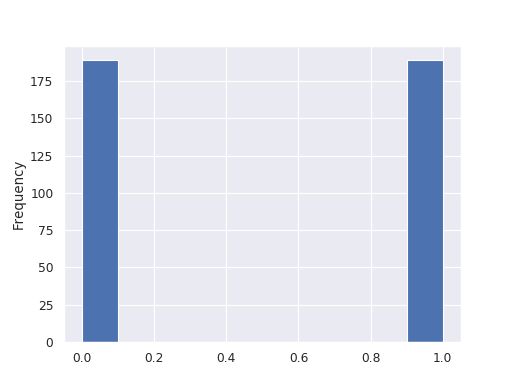

In [171]:
%matplotlib notebook
new_data['angry-aggresive'].plot(kind = 'hist')

In [172]:
new_data.shape

(378, 78)

In [173]:
new_data.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
275,0.061391,0.134275,0.085648,-69.242042,5.150191,-0.069048,2.347214,0.412375,1.037049,0.542830,...,2.0,0.384546,0.228637,0.719398,1,0,0,0,0,0
73,0.088223,0.156644,0.082247,-74.329536,5.929392,-0.728880,1.497519,-0.131672,0.722617,0.040061,...,2.0,0.295711,0.268653,0.644027,1,1,1,0,0,0
191,0.061903,0.121791,0.077300,-81.929769,7.307117,-0.700041,1.850503,0.073356,0.762665,0.177509,...,2.0,0.240999,0.137842,0.519280,0,1,1,0,0,0
306,0.089745,0.265649,0.076258,-64.273652,2.893230,0.484659,1.793095,0.303931,0.897628,0.525120,...,2.0,0.185208,0.259367,0.467918,1,0,0,0,1,0
478,0.035760,0.053166,0.077110,-78.220551,6.622296,3.339658,2.797134,0.563713,1.896510,0.961423,...,2.0,0.393257,0.542830,0.985315,0,0,1,1,1,0


## 3. NORMALIZING

In [174]:
from sklearn import preprocessing

normalized = new_data

normal = preprocessing.RobustScaler()
normalized = pd.DataFrame(normal.fit_transform(new_data), columns = new_data.columns.values)
normalized['angry-aggresive'] = new_data['angry-aggresive'].values
normalized.head()


,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,-0.137942,-0.345614,0.051699,0.221066,0.305342,-0.511666,0.726793,-0.360595,0.507645,-0.090680,...,0.0,0.122648,-0.071823,-0.154187,1.0,0.0,0.0,0.0,0.0,0
1,0.449793,-0.198921,-0.232814,-0.336033,0.573597,-0.978069,-0.329854,-1.341194,-0.190893,-1.445687,...,0.0,-0.115678,0.014328,-0.255715,1.0,1.0,1.0,0.0,0.0,0
2,-0.126727,-0.427483,-0.646659,-1.168286,1.047905,-0.957684,0.109103,-0.971648,-0.101923,-1.075252,...,0.0,-0.262459,-0.267297,-0.423754,0.0,1.0,1.0,0.0,0.0,0
3,0.483131,0.515923,-0.733828,0.765122,-0.471660,-0.120277,0.037713,-0.556056,0.197909,-0.138410,...,0.0,-0.412134,-0.005664,-0.492940,1.0,0.0,0.0,0.0,1.0,0
4,-0.699370,-0.877518,-0.662554,-0.762113,0.812143,1.897783,1.286296,-0.087821,2.417013,1.037464,...,0.0,0.146017,0.604607,0.204014,0.0,0.0,1.0,1.0,1.0,0


### 2.4. Train-Test Split

In [175]:
from sklearn.model_selection import train_test_split



X = normalized.iloc[:, :-6]
y = normalized.iloc[:, [72,73,74,75,76,77]]


#train, test = train_test_split(data, random_state=42, test_size=0.25, shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=4, test_size=0.2, shuffle=True)



In [176]:


print(x_train.shape)
print(x_test.shape)


(302, 72)
(76, 72)


In [177]:
y

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,1.0,0.0,0.0,0.0,0.0,0
1,1.0,1.0,1.0,0.0,0.0,0
2,0.0,1.0,1.0,0.0,0.0,0
3,1.0,0.0,0.0,0.0,1.0,0
4,0.0,0.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...
373,0.0,0.0,0.0,0.0,1.0,1
374,1.0,0.0,0.0,0.0,0.0,1
375,1.0,0.0,0.0,0.0,1.0,1
376,1.0,0.0,0.0,0.0,0.0,1


In [178]:

print(y_train.shape)

print(y_test.shape)



(302, 6)
(76, 6)


## 3. Multi-Label Classification

In [179]:
from sklearn import  metrics
labels = ['amazed-suprised', 'happy-pleased', 'relaxing-calm', 'quiet-still',
       'sad-lonely', 'angry-aggresive']


def metricasDesempenho(y_test,predictions,labels,title = "alguma coisa"):
    if title != "alguma coisa":
        print(title)
        
    matrix = metrics.multilabel_confusion_matrix(y_test, predictions)
    sens = 0
    espec = 0
    acuracia = 0
    resultados = []
    for i in range(len(matrix)):
        [[vn, fp], [fn, vp]] = matrix[i]
        sen = (vp / (vp + fn))
        esp = (vn / (vn + fp))
        acura = ((vp + vn) / (vp + fn + vn + fp))
        sens += sen
        espec += esp
        acuracia += acura
        resultados.append({"Label": labels[i], "Sensibilidade": sen, "Especificidade": esp, "Acurácia": acura})
   
    print("F1: %0.3f" % (metrics.f1_score(y_test, predictions, average = 'macro')))    
    print("Sensibilidade: %0.3f" % (sens / len(matrix)))
    print("Especificidade: %0.3f" % (espec / len(matrix)))
    print("Acurácia: %0.3f" % (metrics.accuracy_score(y_test, predictions, normalize = True)))
    print("Média acurácia individual: %0.3f\n" % (acuracia / len(matrix)))



def matrizConfusao(y_test,predictions):
    matrix = metrics.multilabel_confusion_matrix(y_test, predictions)
    for i in range(len(matrix)):
        print("Matriz de confusão para %s" % (labels[i]))
        print(matrix[i])
        print()

### 3.1. Multiple Binary Classifications - (One Vs Rest Classifier)

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [181]:
%%time

LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} categorie**'.format(category))
    
    LogReg_pipeline.fit(x_train, train[category])
    
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing amazed-suprised categorie**

Test accuracy is 0.4868421052631579




**Processing happy-pleased categorie**

Test accuracy is 0.6973684210526315




**Processing relaxing-calm categorie**

Test accuracy is 0.631578947368421




**Processing quiet-still categorie**

Test accuracy is 0.7368421052631579




**Processing sad-lonely categorie**

Test accuracy is 0.6973684210526315




**Processing angry-aggresive categorie**

Test accuracy is 0.5131578947368421


CPU times: user 88.7 ms, sys: 39.9 ms, total: 129 ms
Wall time: 15 s


### 3.4. Label Powerset

In [185]:
from skmultilearn.problem_transform import LabelPowerset

In [186]:
%%time

classifier = LabelPowerset(svm.SVC())
classifier2 = LabelPowerset(neighbors.KNeighborsClassifier())

classifier.fit(x_train, y_train)
classifier2.fit(x_train, y_train)

predictions = classifier.predict(x_test)
predictions2 = classifier2.predict(x_test)

print("Accuracy1 = ",accuracy_score(y_test,predictions))
print("Accuracy2 = ",accuracy_score(y_test,predictions2))
print("\n")

Accuracy1 =  0.5
Accuracy2 =  0.39473684210526316


CPU times: user 94.1 ms, sys: 15.4 ms, total: 109 ms
Wall time: 1.72 s


In [187]:

metricasDesempenho(y_test,predictions,labels,"Medidas de Desempenho1 svm : ")
matrizConfusao(y_test,predictions)

metricasDesempenho(y_test,predictions2,labels,"Medidas de Desempenho2 knn : ")
matrizConfusao(y_test,predictions2)


Medidas de Desempenho1 svm : 
F1: 0.643
Sensibilidade: 0.648
Especificidade: 0.870
Acurácia: 0.500
Média acurácia individual: 0.816

Matriz de confusão para amazed-suprised
[[39 15]
 [ 5 17]]

Matriz de confusão para happy-pleased
[[54  2]
 [19  1]]

Matriz de confusão para relaxing-calm
[[44  0]
 [13 19]]

Matriz de confusão para quiet-still
[[58  1]
 [ 3 14]]

Matriz de confusão para sad-lonely
[[57  2]
 [ 6 11]]

Matriz de confusão para angry-aggresive
[[25 18]
 [ 0 33]]

Medidas de Desempenho2 knn : 
F1: 0.635
Sensibilidade: 0.612
Especificidade: 0.872
Acurácia: 0.395
Média acurácia individual: 0.796

Matriz de confusão para amazed-suprised
[[45  9]
 [ 9 13]]

Matriz de confusão para happy-pleased
[[46 10]
 [16  4]]

Matriz de confusão para relaxing-calm
[[43  1]
 [15 17]]

Matriz de confusão para quiet-still
[[56  3]
 [ 3 14]]

Matriz de confusão para sad-lonely
[[55  4]
 [ 5 12]]

Matriz de confusão para angry-aggresive
[[31 12]
 [ 6 27]]



### 3.5. Adapted Algorithm

In [188]:

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [189]:
%%time

classifier_new = MLkNN(k=3)


x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

classifier_new.fit(x_train, y_train)

predictions_new = classifier_new.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

Accuracy =  0.39473684210526316


CPU times: user 337 ms, sys: 0 ns, total: 337 ms
Wall time: 800 ms
